In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium

# Displots

In [7]:
inspect=pd.read_csv("../../census/2018Dec_Inspection.txt",sep=",",encoding="latin-1",nrows=1000000)
inspect = inspect[(inspect.T != 0).any()]

inspect.dropna(subset=["VIN"],inplace=True)

C:\Users\rinsh\AppData\Roaming\Python\Python36\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
truck = inspect.loc[inspect["UNIT_TYPE_DESC"] == "TRUCK TRACTOR"]

unsafe = truck["UNSAFE_VIOL"]
basic = truck["BASIC_VIOL"]
vehicle = truck["VEHICLE_OOS_TOTAL"]
hm = truck["HM_VIOL"]
hm = np.nan_to_num(hm)

C:\Python36\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


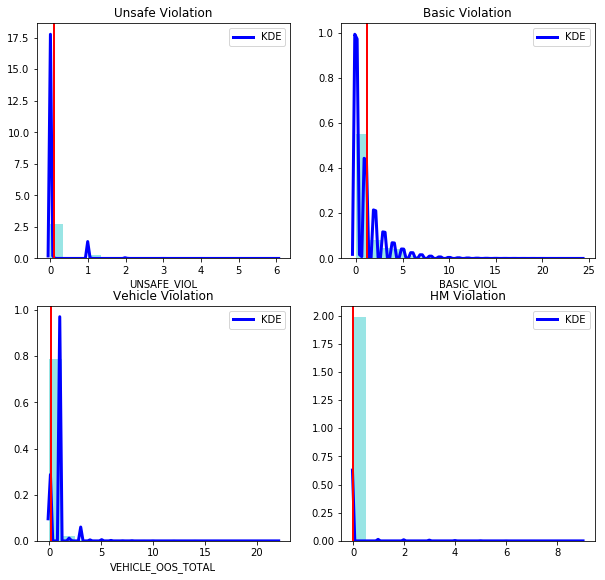

In [9]:
figure, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize = (10,8))
#d.plot.hist(grid=True,bins=20,color='c')
sns.distplot(unsafe, hist=True, 
             bins=int(180/10), color = 'c',kde_kws={"color": "blue", "lw": 3, "label": "KDE"},ax=ax1)
ax1.axvline(unsafe.mean(), color='red', linestyle='solid', linewidth=2)
ax1.set_title('Unsafe Violation')

sns.distplot(basic, hist=True, 
             bins=int(180/10), color = 'c',kde_kws={"color": "blue", "lw": 3, "label": "KDE"},ax=ax2)
ax2.axvline(basic.mean(), color='red', linestyle='solid', linewidth=2)
ax2.set_title('Basic Violation')

sns.distplot(vehicle, hist=True, 
             bins=int(180/10), color = 'c',kde_kws={"color": "blue", "lw": 3, "label": "KDE"},ax=ax3)
ax3.axvline(vehicle.mean(), color='red', linestyle='solid', linewidth=2)
ax3.set_title('Vehicle Violation')


sns.distplot(hm, hist=True, 
             bins=int(180/10), color = 'c',kde_kws={"color": "blue", "lw": 3, "label": "KDE"},ax=ax4)
ax4.axvline(hm.mean(), color='red', linestyle='solid', linewidth=2)
ax4.set_title('HM Violation')

plt.subplots_adjust(left =0.125,right=0.9,top=0.9,bottom=0.001)

# Map

In [10]:
census = pd.read_csv("../../census/FMCSA_CENSUS1_2018Dec.txt", sep=",",encoding="latin-1")
cord = pd.read_csv("../../census/statelatlong.csv") 

In [11]:
census = census.loc[census["PHY_STATE"].isin(cord["State"])]

df = pd.crosstab(census.PHY_STATE, census.CARRIER_OPERATION)
df = df.reindex(index=cord["State"])

alist = df["A"].values.tolist()
blist = df["B"].values.tolist()
clist = df["C"].values.tolist()
statelist = cord["State"].values.tolist()

In [12]:
drop_map = folium.Map(location = [36.778259,-100.417931],zoom_start=4)
for index, row in cord.iterrows():
    
    folium.CircleMarker([row['Latitude'], row['Longitude']],
                        radius=5,
                        popup=statelist[index] + "<br>" + "A = " + str(alist[index]) + "<br> B = " + str(blist[index]) + "<br> C = " + str(clist[index]) + "<br>",
                        fill = True,
                        fill_color="#008000", 
                        fill_opacity=1
                       ).add_to(drop_map)

drop_map

# Pie Chart

In [13]:
def details(pstate):
        data_of_presentstate=census.loc[census["PHY_STATE"]==pstate]
        A=len((data_of_presentstate.loc[census["CARRIER_OPERATION"]=="A"]))
        B=len(data_of_presentstate.loc[census["CARRIER_OPERATION"]=="B"])
        C=len(data_of_presentstate.loc[census["CARRIER_OPERATION"]=="C"])
        result=pd.DataFrame({'CHART':[A,B,C]}, index=["A","B","C"])
        result.plot.pie(y="CHART",figsize=(5,5))
        return A,B,C

CA


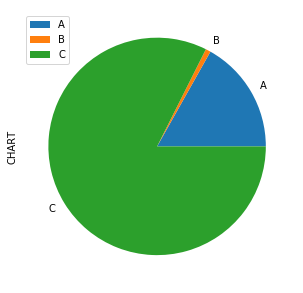

In [14]:
state=details(input())

In [15]:
print(state)

(41160, 1841, 201409)
